In [1]:
import timeit
main_start_time = timeit.default_timer()
from IPython.display import Image
Image(url="https://cdn.pocket-lint.com/r/s/970x/assets/images/140219-tv-news-feature-netflix-tips-and-tricks-how-to-master-your-binge-watching-experience-image4-rivlhfwq6o-jpg.webp?v1",)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
net=pd.read_csv("netflix.csv")
net['date_added']=pd.to_datetime(net['date_added'])
net['show_id']=net['show_id'].apply(lambda x:x[-1])
net['show_id']=net['show_id'].astype(int)
net_org=net.copy()

In [3]:
## Updating the Null Values of date to release year there are total 10 records updating them to release year 
df=net[net['date_added'].isna()][['date_added','release_year']]
df['release_year']=df['release_year'].astype(str) +'-01-01'
df['release_year']=pd.to_datetime(df['release_year'])
net['date_added'].fillna(df['release_year'],inplace=True)
net['year_added']=net['date_added'].dt.year.astype(int)
net_org=net.copy()
net.iloc[df.index] ## This show show updated value of dates

NumExpr defaulting to 8 threads.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6066,7,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Christopher Godwin, Rosie Cavaliero, Vicki Pepperdine, Margaret Clunie, Tim Steed, Shaun Pye",United Kingdom,2013-01-01,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic miniseries is based on a doctor's memories of his early career working in an out-of-the-way village.",2013
6174,5,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,2018-01-01,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bourdain traveling to extraordinary locations around the globe to sample a variety of local cuisines.,2018
6795,6,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce, Peri Gilpin, John Mahoney, Dan Butler",United States,2003-01-01,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle psychiatrist who dispenses advice on his call-in radio show while ignoring it in his own relationships.,2003
6806,7,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,2003-01-01,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.",2003
6901,2,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Ami Koshimizu, Hidenobu Kiuchi, Mitsuru Miyamoto, Masashi Ebara, Norihiro Inoue, Rie Nakagawa, Masami Iwasaki, Laura Bailey, Luci Christian, Caitlin Glass, Alese Johnson, Monica Rial, Jerry Jewell, Stephanie Young, Mike McFarland",Japan,2008-01-01,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appears to help orphaned schoolgirls, but it's actually turning them into lethal agents.",2008
7196,7,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,2010-01-01,2010,TV-Y,2 Seasons,Kids' TV,"A wacky rabbit and his gang of animal pals have fun solving problems, sharing stories and exploring their sometimes magical, always special world.",2010
7254,5,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ávila, Regina Blandón, Miguel Perez, Barbara Torres, Dalilah Polanco, Pierre Angelo",United States,2012-01-01,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Shows, TV Comedies","This irreverent sitcom featues Ludovico, Federica and their three children Bibi, Junior and Ludoviquito, living in Ciudad P. Luche.",2012
7406,7,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zehetner, Andy Kindler",United States,2016-01-01,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews fellow comedians for his popular podcast, only to reveal more about his own neuroses and relationships.",2016
7847,8,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, Geoff Lazer Ramsey, Joel Heyman, Matt Hullum, Dan Godwin, Kathleen Zuelch, Yomary Cruz, Nathan Zellner",United States,2015-01-01,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon.",2015
8182,3,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Hamlyn, Stavroula Mountzouris, Aletheia Burney",Australia,2015-01-01,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: Figaro is a boy with any number of phobias and a highly quirky and imaginative way of dealing with them.",2015


## Lets Describe the Netflix Data Set
 1. show_id  : Shows what is the SHow ID its Unique Count .     
 1. type     : Type either Movie or Telivision Show ( there are only 2 Types).
 1. title    : Title or Name of Movie or Telivisin Show .    
 1. director : Director of TV Show or Movie ( Has Multiple Null Values).    
 1. cast     : Actor and Acrtress, in case of TV shows cast is large number of actors. 
 1. country  : Country for which Movie or TV Serial is made for
 1. date_added : Date on which it was added to Netflix 
 1. release_year :  Year of Release of Movie or TV Show
 1. rating    : Different Rating given
 1. duration  : Duration in Minutes or Number of Season in case TV Show
 1. listed_in : Category in Netflix   
 1. description : Short Description on Movie or TV Serial 

In [4]:
net.info()
# We can observe Tv Shows has high number of casting as compared to movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   int32         
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 825.8+ KB


## Find the Missing Values

Total Rows 8807 and Total Columns 13


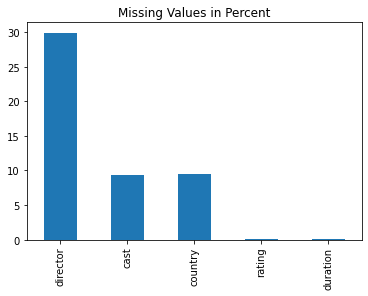

In [5]:
import matplotlib.pyplot as plt
print("Total Rows {} and Total Columns {}".format(net.shape[0],net.shape[1]))
df=net.isna().sum()
round(df[(df>0)]*100/8807,2).plot(kind="bar")
plt.title("Missing Values in Percent")
plt.show()

### Observations
1. Director Columns has approx 30% missing values
1. Cast and Country has 9% missing values
1. date_added , rating , duration has less than 1% missing values
1. Netflix data has 8807 rows and 12 Columns

In [6]:
# Describe all Columns on dataframe including catagorical.
net.describe(include='all') 

<ipython-input-6-fe6f4d65106e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  net.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
count,8807.0,8807,8807,6173,7982,7976,8807,8807.0,8803,8804,8807,8807,8807.0
unique,NaN,2,8807,4528,7692,748,1719,NaN,17,220,514,8775,NaN
top,NaN,Movie,The Seven Deadly Sins the Movie: Prisoners of the Sky,Rajiv Chilaka,David Attenborough,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.",NaN
freq,NaN,6131,1,19,19,2818,110,NaN,3207,1793,362,4,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1925.0,NaN,NaN,NaN,NaN,2003.0
25%,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,2018.0
50%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,2019.0
75%,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,NaN,NaN,NaN,2020.0


In [7]:
## Checking values with Nan Values.
df[(df>0)]

director    2634
cast         825
country      831
rating         4
duration       3
dtype: int64

## Checking Duplicate Values

In [8]:
print(net.shape)
temp = net[net.duplicated()]
print(temp.shape[0])
print(" From the Above Code we can see there are no Duplicate Values")
del temp

(8807, 13)
0
 From the Above Code we can see there are no Duplicate Values


## Handling Missing Values 
1. Data Columns 
1. Duration Columns 

In [9]:
net[["director","cast"]].sort_values(by="director")
net[net["country"]=="India"] # Checking data set where country is India 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",2021
24,5,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies","When the father of the man she loves insists that his twin sons marry twin sisters, a woman creates an alter ego that might be a bit too convincing.",2021
39,0,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman powers leads his friends on exciting adventures to guard their fellow Dholakpur villagers from evil.",2021
50,1,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, Ankit Arora, Pushkar Goggiaa, Anjali Rana, Aarya DharmChand Kumar, Amit Behl, Maleeka Ghai",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","After the ancient Great War, the god Chitragupta oversees a trial to determine who were the battle's true heroes and villains.",2021
66,7,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows","Explore the history and flavors of regional Indian cuisine, from traditional Kashmiri feasts to the vegetarian dishes of Gujarat.",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,4,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, Atmaram Bhende, Asha Bhende",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies","Thanks to an arranged marriage that was designed to make an ailing grandmother happy, newlyweds Rahul and Swati are virtually strangers. Can a four-day honeymoon make a difference when it comes to the couple's feelings about each other?",2018
8775,6,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ahan Nirban, Ruhi Khan, Prasad Reddy, Revathi Pillai",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu balances school, family, friendship and other challenges of growing up.",2018
8798,9,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay Mishra, Anil Rastogi, Ravi Jhankal, Kulbhushan Kharbanda, Ekavali Khanna, Mukesh Tiwari, Vinod Acharya",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political ambitions are sparked when the visiting prime minister mistakenly grants him special security clearance.,2019
8799,0,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit Patil, Chinmay Mandlekar, Rajesh Shringarpure, Pushkar Shrotri, Tejashree Pradhan, Neha Joshi",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political party sparks bitter conflict and the party's division into two rival factions.,2018


## Updating Duration and date columns
1. Checking nan values for duration
1. we can see duration values is in rating as the figure show in minutes
1. Updating such values to rating
1. Updating rating values to Np.nan

In [10]:
print(net[net['duration'].isna()])
print(net['rating'].value_counts())
df1=net[net['duration'].isna()]
net['duration'].fillna(net['rating'],inplace=True)
net['rating'].iloc[[df1.index]]=np.nan

C:\Users\naren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


      show_id   type                                 title    director  \
5541        2  Movie                       Louis C.K. 2017  Louis C.K.   
5794        5  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813        4  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16          2010  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15          2015  66 min      NaN   

     listed_in                                        description  year_added  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...        2017  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...        2016  
5813    Movies  The comic puts his trademark hilarious/thought...        2016  
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13 

C:\Users\naren\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:1035: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


In [11]:
## Updating Rating as "Not Available"
net['rating'].fillna("Not Available",inplace=True)

## Updating Director as Not available and Cast as well
net['director'].fillna("Not Available",inplace=True)
net['cast'].fillna("Not Available",inplace=True)

net['country'].fillna("Not Available",inplace=True)

## Function to convert the multi columns to single in different rows in Dataset

In [12]:
def convert_col(df,col):
    # This function converts the columns in composit columns to multiple columns in data frame.
    constraint=df[col].apply(lambda x: str(x).split(', ')).tolist() 
    net_new=pd.DataFrame(constraint,index=df['title']) 
    net_new=net_new.stack()
    net_new=pd.DataFrame(net_new)
    net_new.reset_index(inplace=True)
    net_new.drop("level_1",axis=1,inplace=True)
    net_new.rename(columns={0:col},inplace=True)
    df=pd.merge(df,net_new,how="inner",on="title")
    df.rename(columns={col+'_y':col},inplace=True)
    #print(df.columns)
    df.drop(col+'_x',inplace=True,axis=1)
    return df

### Creating Seperate columns for Cast for each actor one row will be inserted 
1. All cast will have one Row Associated
1. Merge data frame is merging the date in one columns
1. After merge 2 columns are inserted one as cast_x and cast_y where cast_x has composite value and cast_y has one cast per row 
1. we will drop the cast_x and rename the cast_y to cast columns

In [13]:
## Checking on How many movies are there with multiple direcotr
df=net[~net['director'].isna()]
df.shape
print("Total Records with multiple directors ",len(df[df['director'].str.contains(",")]))
df[df['director'].str.contains(",")]

Total Records with multiple directors  614


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",Not Available,2021-09-24,2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.",2021
16,7,Movie,Europe's Most Dangerous Man: Otto Skorzeny in Spain,"Pedro de Echave García, Pablo Azorín Williams",Not Available,Not Available,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies","Declassified documents reveal the post-WWII life of Otto Skorzeny, a close Hitler ally who escaped to Spain and became an adviser to world presidents.",2021
23,4,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, AC Lim",Not Available,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,"From arcade games to sled days and hiccup cures, Cory Carson’s curious little sister Chrissy speeds off on her own for fun and adventure all over town!",2021
30,1,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwale, Kunal Kapoor, Zoya Hussain, Nikhil Dwivedi, Palomi Ghosh",Not Available,2021-09-17,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely souls discover surprising sources of connection and companionship in three tales of love, loss and longing.",2021
68,9,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michael Wech",Michael Schumacher,Not Available,2021-09-15,2021,TV-14,113 min,"Documentaries, International Movies, Sports Movies","Through exclusive interviews and archival footage, this documentary traces an intimate portrait of seven-time Formula 1 champion Michael Schumacher.",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,8,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",Not Available,"United Kingdom, India, United States",2016-12-25,2013,NR,75 min,"Documentaries, International Movies","A small-town taxi driver is arranged to be married, resulting in an intimate look at the clash between modernity and tradition in India.",2016
8728,9,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",Not Available,"Peru, United States, United Kingdom",2016-11-30,2016,TV-14,103 min,"Documentaries, International Movies",This documentary takes a hard look at how indigenous peoples clashed violently with the Peruvian government over land and economics in the Amazon.,2016
8737,8,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions about living with obesity and explores why the epidemic continues to expand across the UK and America.,2019
8739,0,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",Not Available,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed documentary series highlights the need for a Russo-American alliance to defeat the Nazis.,2017


### Here we are calling the Function convert_col to only compare the listed in values if we combine the values of other columns the dataset will have very high number of columns which will not depict to true value.

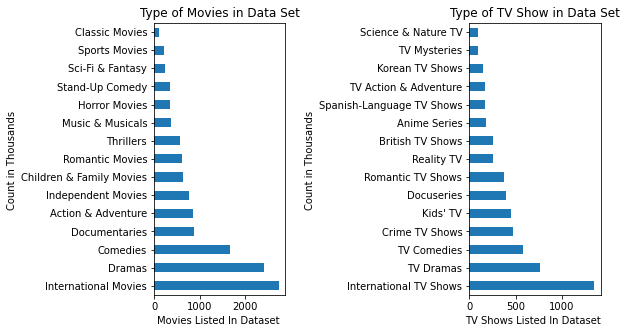

In [14]:
df=convert_col(net,'listed_in')

plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
## Lets looks at Movies and Tv Shows Separetly 
df[df['type']=='Movie'].listed_in.value_counts().head(15).plot(kind='barh')
plt.title("Type of Movies in Data Set")
plt.xlabel("Movies Listed In Dataset ")
plt.ylabel("Count in Thousands ")


## Tv Shows
plt.subplot(1,3,3)
df[df['type']=='TV Show'].listed_in.value_counts().head(15).plot(kind='barh')
plt.title("Type of TV Show in Data Set")
plt.xlabel("TV Shows Listed In Dataset ")
plt.ylabel("Count in Thousands ")
plt.show()

### Observation 
1. In Case of Movies International Movies are most Popular followd by Documenteries and Comedies.
1. Documenteires and other types are populary in movies
1. International TV Shows are most popular in TV Shows followed by Dramas
1. In case of TV Shows Drams Comedies and TV Shows popular as well
 

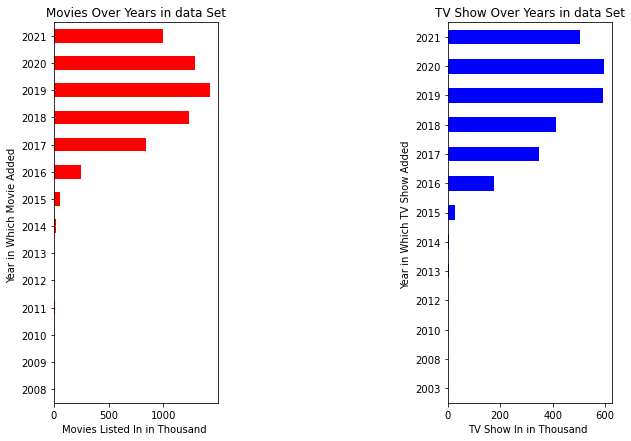

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
df1=net[net['type']=='Movie']['year_added'].value_counts(sort=False,dropna=True)
df1=df1.sort_index()
plt.title("Movies Over Years in data Set")
plt.xlabel("Movies Listed In in Thousand ")
plt.ylabel("Year in Which Movie Added ")
df1.plot(kind='barh',color ='red')

plt.subplot(1,3,3)
df1=net[net['type']=='TV Show']['year_added'].value_counts(sort=False,dropna=True)
df1=df1.sort_index()
df1.plot(kind='barh',color ='maroon')
plt.title("TV Show Over Years in data Set")
plt.xlabel("TV Show In in Thousand ")
plt.ylabel("Year in Which TV Show Added ")
df1.plot(kind='barh',color ='blue')
plt.show()

### Observations 
1. The Net Flix addition picked up from 2015 in case of movies and 2016 in case of TV Shows . 
1. With Cloud and Streaming on Cloud becoming cheaper , Net Flix has started adding More TV shows and Movies post 2015.
1. There is sharp rise in no of Movies in 2017 and similar in case of TV shows in 2019 and 2021
1. Trends for Movies and TV shows fluctuation both 2018 to 2021

## Movies and TV Shows Added Over Years in Net Flix 

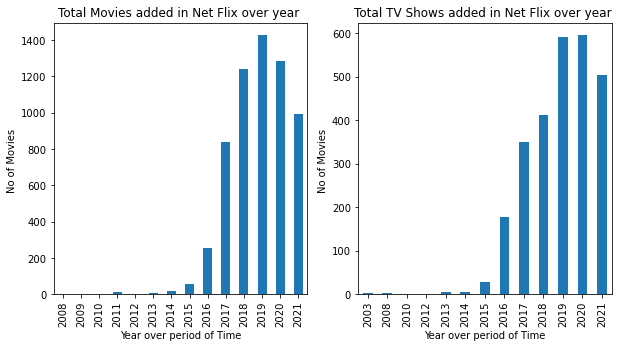

In [16]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
df1=net[net['type']=='Movie']['year_added'].value_counts(sort=False,dropna=True)
df1=df1.sort_index()
df1.plot(kind='bar')
plt.title("Total Movies added in Net Flix over year ")
plt.ylabel("No of Movies ")
plt.xlabel("Year over period of Time")

plt.subplot(1,2,2)
df2=net[net['type']=='TV Show']['year_added'].value_counts(sort=False,dropna=True)
df2=df2.sort_index()
df2.plot(kind='bar')
plt.title("Total TV Shows added in Net Flix over year ")
plt.ylabel("No of Movies ")
plt.xlabel("Year over period of Time")

plt.show()
#net['date_added'].dt.year.astype('Int64').value_counts().plot(kind='bar')

### Observation 
1. Each Year approx Double Movies gets added to netflix as compared to TV Shows post 2014
1. Most Movies Started Added in Netflix after 2015 which may be due to infrastrucutre expansion by Netflix to store and stream movies
1. TV Shows started increasing from 2016 and has more than doubled from 2016 to 2019 same is for movies , TV Shows likely are popular on Netflix . 
1. Netflix has started added most contents after 2015

## Converting the country columns to single

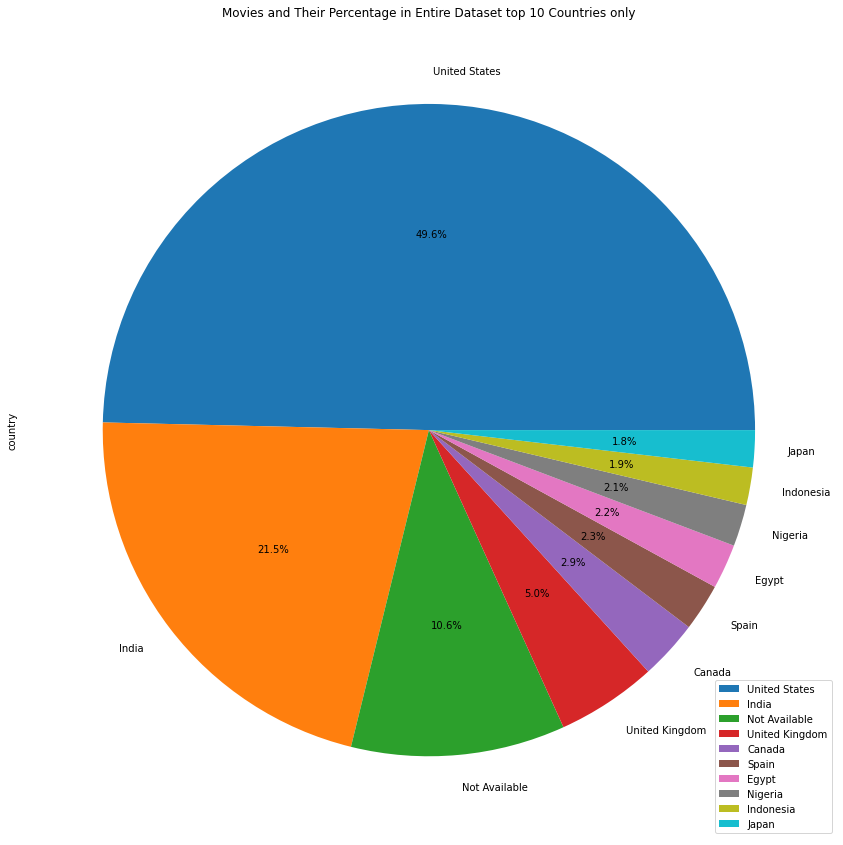

In [17]:
plt.figure(figsize=(15 ,15))
net[net['type']=='Movie']['country'].value_counts().head(10).plot(kind='pie',autopct='%0.1F%%')
plt.title("Movies and Their Percentage in Entire Dataset top 10 Countries only")
plt.legend()
plt.show()
#net[net['type']=='TV Show']['country'].value_counts().head(10).plot(kind='pie')

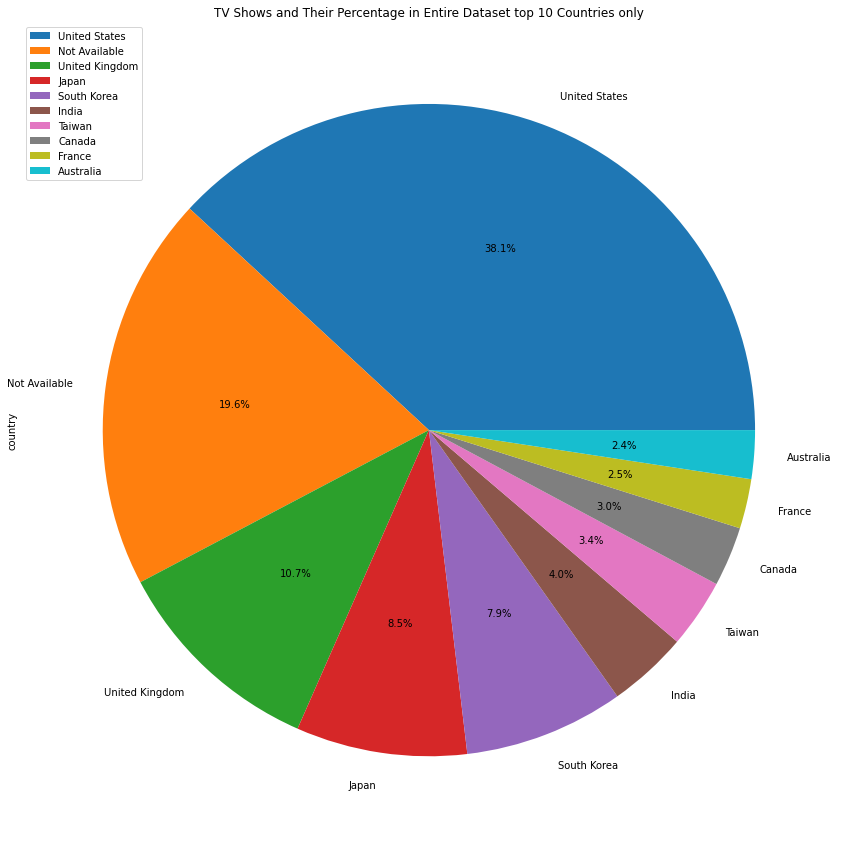

In [18]:
plt.figure(figsize=(15 ,15))
net[net['type']=='TV Show']['country'].value_counts().head(10).plot(kind='pie',autopct='%0.1F%%')
plt.legend()
plt.title("TV Shows and Their Percentage in Entire Dataset top 10 Countries only")
#net[net['type']=='TV Show']['country'].value_counts().head(10).plot(kind='pie')
plt.show()

### Observations
1. US has Maximum Movies and TV Show which mean US is 1 reveue generator for Netflix they should spend release more content in US 
1. UK is 2nd Most popular in Tv Show
1. India has mix audience for movies and tv shows
1. Bangladesh has more moviw but no tv shows in top 10 

## Lets Looks at Director , Country wise Movies and TV Shows

In [19]:
## Check Most Popular Direcotry in Dataset for Both Movies and TV Shows
df=convert_col(net,'director')
#df=convert_col(df,'listed_in')
#df=convert_col(df,'country')
#df1=df[df['director']!='Not Available'][['director','country','type','listed_in']]
df1=df.copy()

<AxesSubplot:title={'center':' Top Director of TV Shows'}>

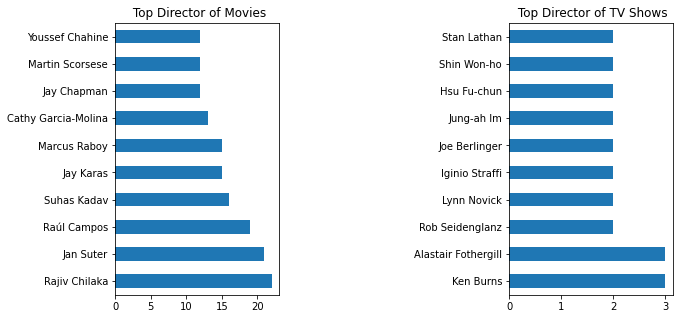

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
df1[(df1['type']=='Movie') & (df1['director']!='Not Available')]['director'].value_counts().head(10).plot(kind='barh')
plt.title(" Top Director of Movies")

plt.subplot(1,3,3)
plt.title(" Top Director of TV Shows")
df1[(df1['type']=='TV Show') & (df1['director']!='Not Available') ]['director'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:title={'center':' Top Director of TV Shows Country wise '}, ylabel='director,country'>

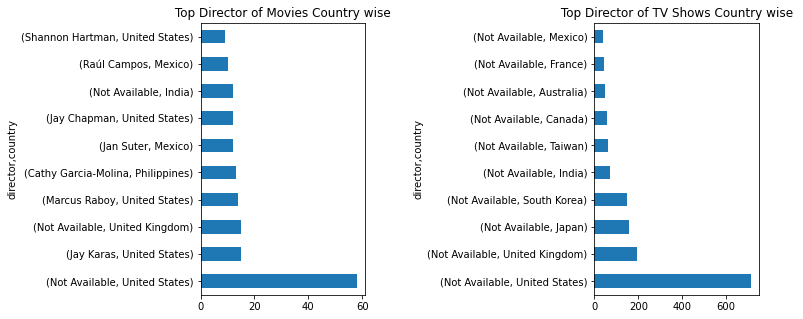

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
df1[(df1['country']!='Not Available') & (df1['type']=='Movie')][['director','country']].value_counts().head(10).plot(kind='barh')
plt.title(" Top Director of Movies Country wise ")

plt.subplot(1,3,3)
plt.title(" Top Director of TV Shows Country wise ")
df1[(df1['country']!='Not Available') & (df1['type']=='TV Show')][['director','country']].value_counts().head(10).plot(kind='barh')

<AxesSubplot:title={'center':' TV Shows and Countries wise count'}>

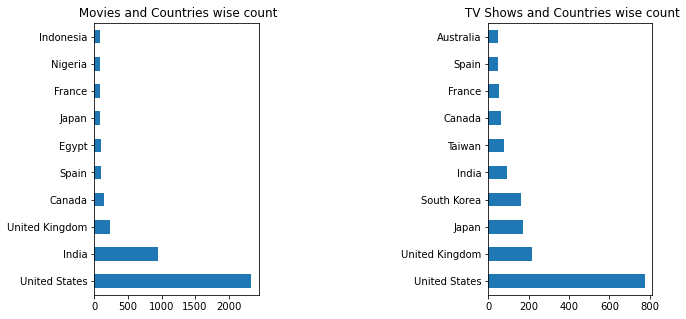

In [22]:
## List of Counteries 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title(" Movies and Countries wise count")
df1[(df1['country']!='Not Available')& (df1['type']=='Movie')]['country'].value_counts().head(10).plot(kind='barh')

plt.subplot(1,3,3)
plt.title(" TV Shows and Countries wise count")
df1[(df1['country']!='Not Available') & (df1['type']=='TV Show') & (df1['country']!='Not Available')]['country'].value_counts().head(10).plot(kind='barh')

### Observation 
1. Unities States remain no for countries gross highest revenue of netflix must be coming from United States
1. United Kingdom has high interest on TV shows its recommeded to add such shows in UK
1. India Has high liking for Movies analysing further country wise content such movies should be released in india
1. Top Director of Movies are in more than 20+ where in case of TV shows the count is mere 2-3 

## Lets Looks at cast which most popular 

In [23]:
df=convert_col(net,'cast')
df=convert_col(df,'country')
df1=df[df['cast']!='Not Available'][['cast','country','type']]
df1.reset_index(level=0, drop=False,inplace=True)
df1.drop('index',inplace=True,axis=1)

<AxesSubplot:title={'center':' TV Shows and Artist wise count Acted'}>

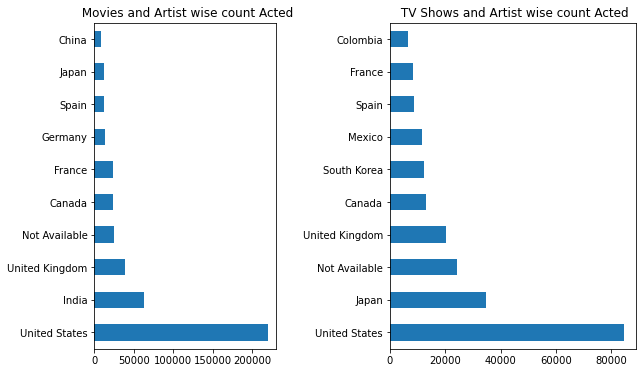

In [24]:
## Count of countries max artist in data set
plt.figure(figsize=(15,6))
plt.subplot(1,4,1)
plt.title(" Movies and Artist wise count Acted")
df1[df1['type']=='Movie']['country'].value_counts().head(10).plot(kind='barh')

plt.subplot(1,3,2)
plt.title(" TV Shows and Artist wise count Acted")
df1[df1['type']=='TV Show']['country'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:title={'center':' TV Shows and Artist wise count Acted'}>

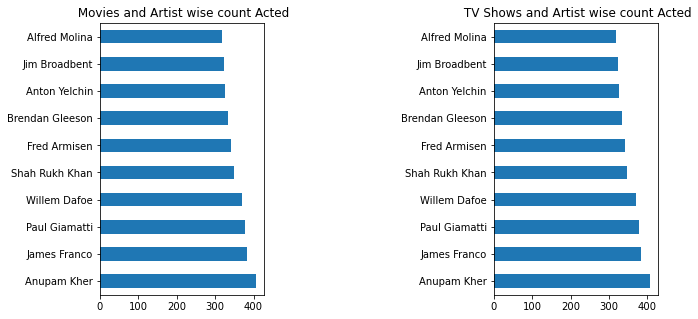

In [25]:
## Cast in Different 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title(" Movies and Artist wise count Acted")
df1[(df1['type']=='Movie')]['cast'].value_counts().head(10).plot(kind='barh')

plt.subplot(1,3,3)
plt.title(" TV Shows and Artist wise count Acted")
df1[(df1['type']=='Movie')]['cast'].value_counts().head(10).plot(kind='barh')

### Observation
1. US has highest no of TV shows and Movies actors
1. Anuper Kher has acted in Max Movies 
1. Takahiro Skahurai has acted in max number of TV Shows 
1. On Average top 10 Movie Actors have have acted in 375 or More Movies similar for 
1. On Average Top 10 TV Shows have acted in 300 or more tv Shows 
1. There is no collision for top 10 moveis which means people are either on TV shows or Movies but not both for top 10 records.


## Checking on Ratings

<AxesSubplot:title={'center':' TV Shows and Rating'}>

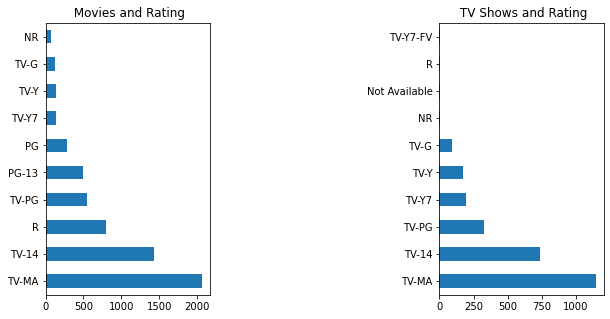

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title(" Movies and Rating")
net[(net['type']=='Movie')]['rating'].value_counts().head(10).plot(kind='barh')

plt.subplot(1,3,3)
plt.title(" TV Shows and Rating")
net[(net['type']=='TV Show')]['rating'].value_counts().head(10).plot(kind='barh')

<AxesSubplot:ylabel='rating,country'>

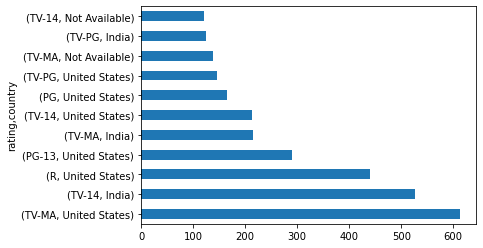

In [27]:
net[net['type']=='Movie'][['rating','country']].value_counts().head(11).plot(kind='barh')

### Observation 
1. TV-MA is commin rating across
1. Other Ratings are similar for Both dataset
1. Every country is different types of Rating . 

## Lets looks at Release Year ,  Duration  Columns


<AxesSubplot:xlabel='release_year', ylabel='year_added'>

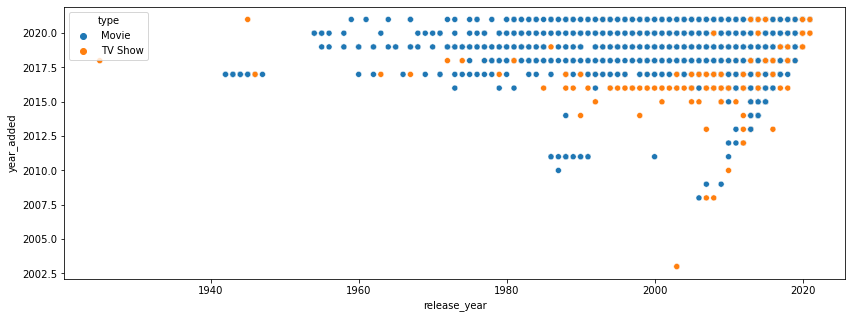

In [28]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='release_year',y='year_added',data=net,hue='type')

In [29]:
## There is High Correlation between Release year and Year Added , i.e year added follows release_year

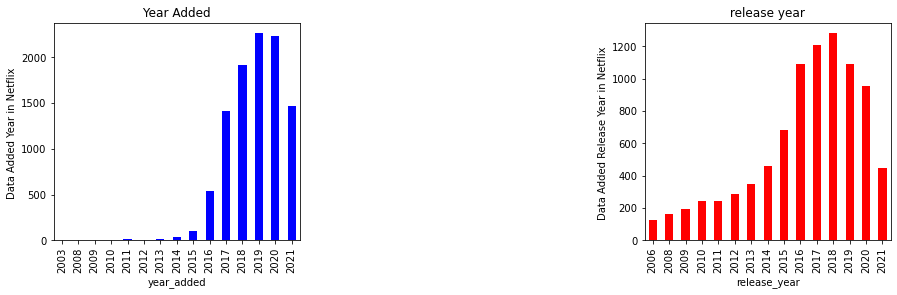

In [30]:
df=convert_col(net,'country')
df1=df[df['country']!='Not Available'][['year_added','release_year','country']]

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title(" Year Added ")
plt.ylabel("Data Added Year in Netflix ")
df2=df1.groupby('year_added').size().sort_values(ascending=False).head(15)#.plot(kind='bar',color='blue')
df2=df2.sort_index()
df2.plot(kind='bar',color='blue')

plt.subplot(1,3,3)
plt.title(" release year ")
plt.ylabel("Data Added Release Year in Netflix ")
df3=df1.groupby(['release_year']).size().sort_values(ascending=False).head(15)#.plot(kind='bar',color='red')
df3=df3.sort_index()
df3.plot(kind='bar',color='red')
plt.show()

### Observations
1. Dataset has release year as long as 1942 which means no of historical movies are there in database
1. Year added and release year has huge gap before 2015 and slowly its brdiging up . 
1. High Number of Movies / TV Shows added  released in 2016 -2019 got Added in Netflix 

## Duration Columns Managing
1. The Movies has duration in Minutes wheres tv shows in season
1. Seperate columns for duration of Movies and TV Shows is added

In [31]:
# Making Copy of Data Frame and df and creating columns tv_show_duration
df=net.copy()
df['tvshow_duration']=df['duration']

In [32]:
df['tvshow_duration']=np.where((df['type']=='Movie'),'0',df['tvshow_duration']) # In case of type is movie set it null else set it duration
df['duration']=np.where((df['type']=='TV Show'),'0',df['duration']) # Update duration to null for tv shows else duration

In [33]:
## Checking Columns
df[['type','duration','tvshow_duration']]

,type,duration,tvshow_duration
0,Movie,90 min,0
1,TV Show,0,2 Seasons
2,TV Show,0,1 Season
3,TV Show,0,1 Season
4,TV Show,0,2 Seasons
...,...,...,...
8802,Movie,158 min,0
8803,TV Show,0,2 Seasons
8804,Movie,88 min,0
8805,Movie,88 min,0


In [34]:
## Making Duration columns numeric and removing min 
df['duration'] = df['duration'].str.replace('min','') # replace min with empty string to conver it string columns
df[df['type']=='Movie'][['type','duration','tvshow_duration']] ## Checking Values Updated 
df['duration']=df['duration'].astype(int) # Converting the columns to int
print(df['duration'].unique()) # Final check on the Columns 

[ 90   0  91 125 104 127  67  94 161  61 166 147 103  97 106 111 110 105
  96 124 116  98  23 115 122  99  88 100 102  93  95  85  83 113  13 182
  48 145  87  92  80 117 128 119 143 114 118 108  63 121 142 154 120  82
 109 101  86 229  76  89 156 112 107 129 135 136 165 150 133  70  84 140
  78  64  59 139  69 148 189 141 130 138  81 132 123  65  68  66  62  74
 131  39  46  38 126 155 159 137  12 273  36  34  77  60  49  58  72 204
 212  25  73  29  47  32  35  71 149  33  15  54 224 162  37  75  79  55
 158 164 173 181 185  21  24  51 151  42  22 134 177  52  14  53   8  57
  28  50   9  26  45 171  27  44 146  20 157  17 203  41  30 194 233 237
 230 195 253 152 190 160 208 180 144   5 174 170 192 209 187 172  16 186
  11 193 176  56 169  40  10   3 168 312 153 214  31 163  19 179  43 200
 196 167 178 228  18 205 201 191]


In [35]:
## Making tvshow_duration Columns Numeric 
df['tvshow_duration'] = df['tvshow_duration'].str.replace('Seasons','') # Replace Seasons with empty
df['tvshow_duration'] = df['tvshow_duration'].str.replace('Season','') # there was on season string to be replaced as well
print(df['tvshow_duration'].unique()) # Checking Unique Values
df['tvshow_duration'] = df['tvshow_duration'].astype(int) # Converting the int from string

['0' '2 ' '1 ' '9 ' '4 ' '5 ' '3 ' '6 ' '7 ' '10 ' '8 ' '17 ' '13 ' '15 '
 '12 ' '11 ']


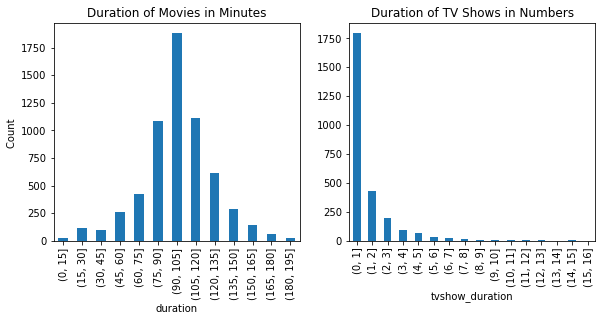

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("Duration of Movies in Minutes")
plt.ylabel("Count ")
plt.xlabel("Count of Movies")
df.duration.groupby(pd.cut(df.duration, np.arange(0,200,15))).count().plot(kind='bar')

plt.subplot(1,3,2)
plt.title("Duration of TV Shows in Numbers")
plt.xlabel("Count of TV Shows")
df.tvshow_duration.groupby(pd.cut(df.tvshow_duration, np.arange(0,17,1))).count().plot(kind='bar')
plt.show()

### Observation 
1. Movies between 90-105 Minutes are Highest in Count 
1. TV Shows max numbers between 0-1 so Single Show is most popular in TV Show
1. TV Show between 0-2 Count also show significant numbers . 
1. Most TV shows shows count under 10 which means people enjoy shorter version with 0-5 most popular
1. Movies with 120 Minutes or more are less which means less than 2 hours movies are more popular
1. Short films are there in Dataset but number are neglible and 15-30 Movies are with less than 50 such movies

In [37]:
elapsed = round(timeit.default_timer() - main_start_time,2)
print("Total Time Taken in Running the Notebook in Minutes :",round(elapsed/60,2))

Total Time Taken in Running the Notebook in Minutes : 0.16


## Conclusion
1. There are multiple Hidden pattern like how the month and date columns works 
1. More time can be spent to find and explore the dataset in more details